In [2]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
import gmaps
import scipy.stats as st
from scipy.stats import linregress
import scipy.stats as stats

In [3]:
# Census & gmaps API Keys
from config import (api_key, gkey)

# Configure gmaps
gmaps.configure(api_key=gkey)

In [4]:
# Run Census Search to retrieve data on all states
# GROUP = "B25071"
#MEDIAN GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS (DOLLARS)

years=[2013,2014,2015,2016,2017,2018]

# Names for your columns

#Jenifer
column1 = "Population"
column2 = "Per Capita Income"
column3 = "Poverty Count"
#Natalia
column4 = "Rent(%)"
column5 = "House with mortgage(%)"
column6 = "House without mortgage(%)"
#Hossein
column7 = "Mean of Trans by Age"
column8 = "Travel Time to Work"
#Daniel (Race part)
column9 = "Race Total"
column10 = "White alone"
column11 = "Block or African American alone"
column12 = "American Indian and Alaska Native Alone"
column13 = "Asian Alone"
column14 = "Unemployement count"

median_rent_pd = pd.DataFrame()
all_years_df = pd.DataFrame()

states_list=[]
years_list=[]

column1_data =[]
column2_data =[]
column3_data =[]
column4_data =[]
column5_data =[]
column6_data =[]
column7_data =[]
column8_data =[]
column9_data =[]
column10_data =[]
column11_data =[]
column12_data =[]
column13_data =[]
column14_data =[]

state_number = []


for y in years:
    
    c = Census(api_key, year=y)
    
    #Give Names for your Groups
    median_rent_data = c.acs5.get(("NAME", "B01003_001E","B19301_001E", "B17001_002E", 
                                   "B25071_001E","B25092_002E", "B25092_003E",
                                  "B08101_001E", "B08303_001E",
                                  "B02001_001E", "B02001_002E", "B02001_003E", "B02001_004E","B02001_005E","B23025_005E"), 
                         {'for': 'state: 06, 08, 12, 16, 41, 48'})
    
        #To assing yeach value with specific year


    # Sorting to put states in the same order states in the table
    median_rent_pd = pd.DataFrame(median_rent_data).sort_values("NAME",ascending=True)
    median_rent_pd = median_rent_pd.reset_index()
    #print(median_rent_pd)
    
    year_column=[]
    for i in range(len(median_rent_pd["state"])):
        year_column.append(y)
    #print(year_column)
    
    #Adding all data into lists
    state_number.extend(median_rent_pd["state"].tolist())
    states_list.extend(median_rent_pd["NAME"].tolist())
    years_list.extend(year_column)
    column1_data.extend(median_rent_pd["B01003_001E"].tolist())
    column2_data.extend(median_rent_pd["B19301_001E"].tolist())
    column3_data.extend(median_rent_pd["B17001_002E"].tolist())
    column4_data.extend(median_rent_pd["B25071_001E"].tolist())
    column5_data.extend(median_rent_pd["B25092_002E"].tolist())
    column6_data.extend(median_rent_pd["B25092_003E"].tolist())
    column7_data.extend(median_rent_pd["B08101_001E"].tolist())
    column8_data.extend(median_rent_pd["B08303_001E"].tolist())
    column9_data.extend(median_rent_pd["B02001_001E"].tolist())
    column10_data.extend(median_rent_pd["B02001_002E"].tolist())
    column11_data.extend(median_rent_pd["B02001_003E"].tolist())
    column12_data.extend(median_rent_pd["B02001_004E"].tolist())
    column13_data.extend(median_rent_pd["B02001_005E"].tolist())
    column14_data.extend(median_rent_pd["B23025_005E"].tolist())    
    
    
#print(years_list)
#print(states_list)

all_years_df["Year"] = years_list
all_years_df["State Name"] = states_list
all_years_df["State Number"] = state_number
all_years_df[column1] = column1_data
all_years_df[column2] = column2_data
all_years_df[column3] = column3_data
all_years_df[column4] = column4_data
all_years_df[column5] = column5_data
all_years_df[column6] = column6_data
all_years_df[column7] = column7_data
all_years_df[column8] = column8_data

all_years_df[column9] = column9_data
all_years_df[column10] = column10_data
all_years_df[column11] = column11_data
all_years_df[column12] = column12_data
all_years_df[column13] = column13_data
all_years_df[column14] = column14_data

all_years_df.head()
#print(states_list)

,Year,State Name,State Number,Population,Per Capita Income,Poverty Count,Rent(%),House with mortgage(%),House without mortgage(%),Mean of Trans by Age,Travel Time to Work,Race Total,White alone,Block or African American alone,American Indian and Alaska Native Alone,Asian Alone,Unemployement count
0,2013,California,06,37659181.0,29527.0,5885417.0,33.7,29.2,11.3,16290887.0,15437979.0,37659181.0,23467167.0,2255372.0,286397.0,5005635.0,2168665.0
1,2013,Colorado,08,5119329.0,31109.0,660874.0,30.9,24.0,10.2,2494794.0,2331060.0,5119329.0,4301096.0,203755.0,49177.0,141719.0,231741.0
2,2013,Florida,12,19091156.0,26236.0,3052807.0,34.9,28.0,13.6,8094220.0,7706393.0,19091156.0,14568521.0,3056152.0,58390.0,475905.0,1096028.0
3,2013,Idaho,16,1583364.0,22568.0,240298.0,29.8,24.1,10.2,684393.0,645127.0,1583364.0,1455692.0,8957.0,19984.0,20141.0,67189.0
4,2013,Oregon,41,3868721.0,26809.0,614778.0,32.2,26.2,12.8,1700451.0,1591348.0,3868721.0,3297149.0,70328.0,47411.0,147986.0,221191.0


In [5]:
# Adding Migration Data per state for 2013-2018
# Migration in US
# Study data files
migration_file_path = "Total_Migration_2013-2018_CSV.csv"

# Read the mouse data and the study results
migration_all_states_df = pd.read_csv(migration_file_path)
migration_all_states_df.head()

,Year,State Name,Move In,Move Out,Delta
0,2013.0,Alabama,104102.0,97219.0,6883.0
1,2013.0,Alaska,34360.0,99931.0,-65571.0
2,2013.0,Arizona,236146.0,183178.0,52968.0
3,2013.0,Arkansas,70621.0,76963.0,-6342.0
4,2013.0,California,485477.0,581679.0,-96202.0


In [6]:
# Combine the two dataframes into a single dataset
merge_data_df = pd.merge(all_years_df,migration_all_states_df, on=["Year","State Name"])
merge_data_df.head(12)

,Year,State Name,State Number,Population,Per Capita Income,Poverty Count,Rent(%),House with mortgage(%),House without mortgage(%),Mean of Trans by Age,Travel Time to Work,Race Total,White alone,Block or African American alone,American Indian and Alaska Native Alone,Asian Alone,Unemployement count,Move In,Move Out,Delta
0,2013,California,06,37659181.0,29527.0,5885417.0,33.7,29.2,11.3,16290887.0,15437979.0,37659181.0,23467167.0,2255372.0,286397.0,5005635.0,2168665.0,485477.0,581679.0,-96202.0
1,2013,Colorado,08,5119329.0,31109.0,660874.0,30.9,24.0,10.2,2494794.0,2331060.0,5119329.0,4301096.0,203755.0,49177.0,141719.0,231741.0,206543.0,166348.0,40195.0
2,2013,Florida,12,19091156.0,26236.0,3052807.0,34.9,28.0,13.6,8094220.0,7706393.0,19091156.0,14568521.0,3056152.0,58390.0,475905.0,1096028.0,529406.0,423995.0,105411.0
3,2013,Idaho,16,1583364.0,22568.0,240298.0,29.8,24.1,10.2,684393.0,645127.0,1583364.0,1455692.0,8957.0,19984.0,20141.0,67189.0,61592.0,63788.0,-2196.0
4,2013,Oregon,41,3868721.0,26809.0,614778.0,32.2,26.2,12.8,1700451.0,1591348.0,3868721.0,3297149.0,70328.0,47411.0,147986.0,221191.0,143841.0,111680.0,32161.0
5,2013,Texas,48,25639373.0,26019.0,4416829.0,29.6,22.5,12.0,11445014.0,10983502.0,25639373.0,19075100.0,3030970.0,129219.0,1019260.0,1020132.0,548034.0,409977.0,138057.0
6,2014,California,06,38066920.0,29906.0,6115244.0,33.8,28.3,11.3,16529777.0,15658667.0,38066920.0,23650913.0,2262323.0,287360.0,5130536.0,2084564.0,513968.0,593308.0,-79340.0
7,2014,Colorado,08,5197580.0,31674.0,663861.0,30.8,23.5,10.1,2544021.0,2377653.0,5197580.0,4364911.0,209062.0,49917.0,146561.0,219241.0,218728.0,173332.0,45396.0
8,2014,Florida,12,19361792.0,26499.0,3159259.0,34.7,26.9,13.3,8228557.0,7823816.0,19361792.0,14747196.0,3114841.0,59121.0,490833.0,1024905.0,546501.0,437516.0,108985.0
9,2014,Idaho,16,1599464.0,23087.0,244618.0,29.7,23.4,10.0,691425.0,650493.0,1599464.0,1468732.0,9334.0,20363.0,21749.0,61837.0,64633.0,56887.0,7746.0


In [7]:
#Column rearrangment
merge_data_df = merge_data_df[['Year','State Name','State Number','Population','Move In','Move Out','Delta','Per Capita Income','Poverty Count','Rent(%)',
 'House with mortgage(%)','House without mortgage(%)','Mean of Trans by Age','Travel Time to Work','Race Total','White alone',
 'Block or African American alone','American Indian and Alaska Native Alone','Asian Alone','Unemployement count']]
merge_data_df.head()

,Year,State Name,State Number,Population,Move In,Move Out,Delta,Per Capita Income,Poverty Count,Rent(%),House with mortgage(%),House without mortgage(%),Mean of Trans by Age,Travel Time to Work,Race Total,White alone,Block or African American alone,American Indian and Alaska Native Alone,Asian Alone,Unemployement count
0,2013,California,06,37659181.0,485477.0,581679.0,-96202.0,29527.0,5885417.0,33.7,29.2,11.3,16290887.0,15437979.0,37659181.0,23467167.0,2255372.0,286397.0,5005635.0,2168665.0
1,2013,Colorado,08,5119329.0,206543.0,166348.0,40195.0,31109.0,660874.0,30.9,24.0,10.2,2494794.0,2331060.0,5119329.0,4301096.0,203755.0,49177.0,141719.0,231741.0
2,2013,Florida,12,19091156.0,529406.0,423995.0,105411.0,26236.0,3052807.0,34.9,28.0,13.6,8094220.0,7706393.0,19091156.0,14568521.0,3056152.0,58390.0,475905.0,1096028.0
3,2013,Idaho,16,1583364.0,61592.0,63788.0,-2196.0,22568.0,240298.0,29.8,24.1,10.2,684393.0,645127.0,1583364.0,1455692.0,8957.0,19984.0,20141.0,67189.0
4,2013,Oregon,41,3868721.0,143841.0,111680.0,32161.0,26809.0,614778.0,32.2,26.2,12.8,1700451.0,1591348.0,3868721.0,3297149.0,70328.0,47411.0,147986.0,221191.0


In [8]:
#Writing DafaFrame to CSV file
merge_data_df.to_csv("all_census_data",index=False)

In [9]:
cal_all_years  = merge_data_df.loc[merge_data_df["State Name"]== "California"]
texas_all_years  = merge_data_df.loc[merge_data_df["State Name"]== "Texas"]
colorado_all_years  = merge_data_df.loc[merge_data_df["State Name"]== "Colorado"]
florida_all_years  = merge_data_df.loc[merge_data_df["State Name"]== "Florida"]
idaho_all_years  = merge_data_df.loc[merge_data_df["State Name"]== "Idaho"]
oregon_all_years   = merge_data_df.loc[merge_data_df["State Name"]== "Oregon"]

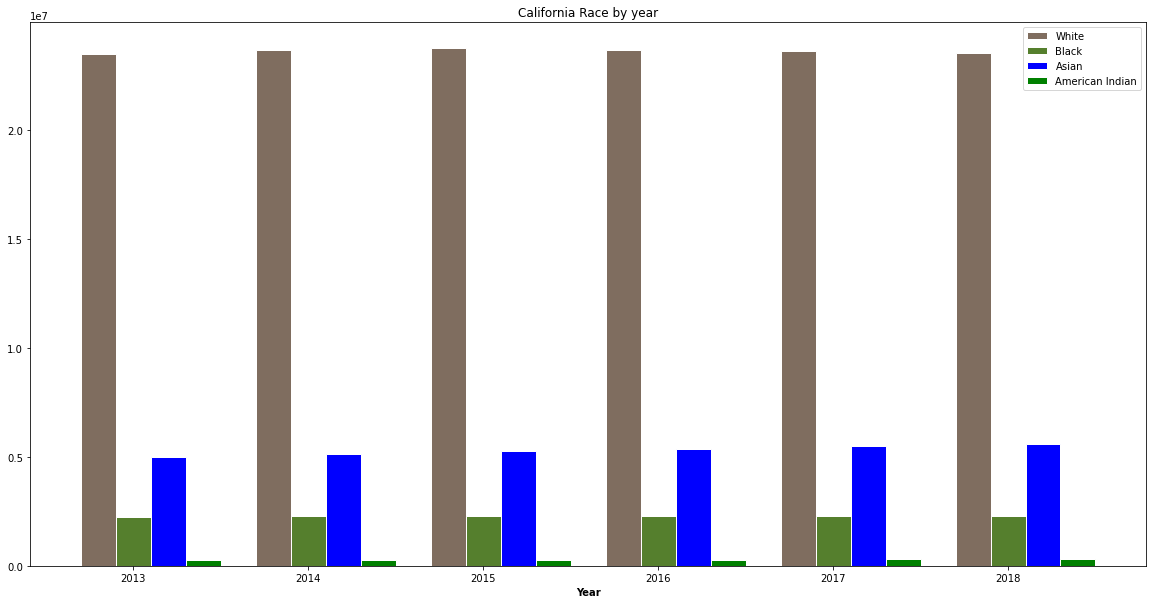

In [10]:
#Bar Chart for race info in California - Dan

plt.figure(figsize=(20,10))
# set width of bar
barWidth = 0.2

# set height of bar
bars1 = cal_all_years["White alone"]
bars2 = cal_all_years["Block or African American alone"]
bars3 = cal_all_years["Asian Alone"]
bars4 = cal_all_years["American Indian and Alaska Native Alone"]

# Set position of bar on X axis

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='White')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Black')
plt.bar(r3, bars3, color='blue', width=barWidth, edgecolor='white', label='Asian')
plt.bar(r4, bars4, color='green', width=barWidth, edgecolor='white', label='American Indian')

# Add xticks on the middle of the group bars
plt.xlabel('Year', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['2013', '2014', '2015', '2016', '2017', '2018'])
plt.title("California Race by year")
# Create legend & Show graphic

plt.legend()
plt.show()

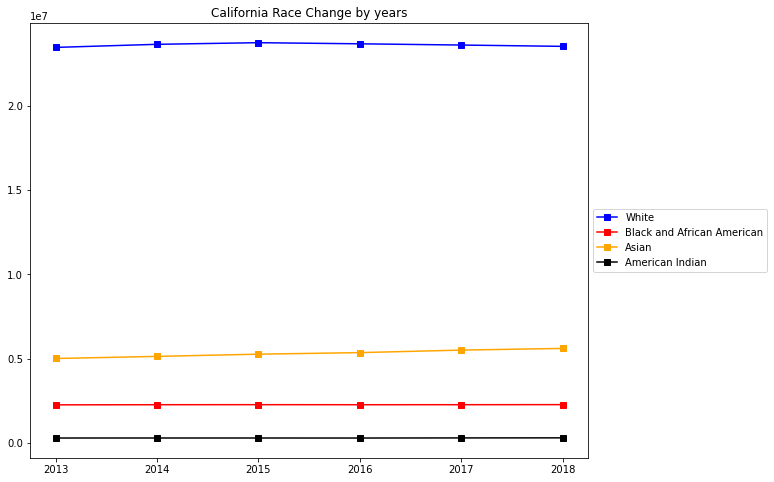

In [11]:
#California Race change- Dan
plt.figure(figsize=(10,8))
x_axis = cal_all_years["Year"]
y_axis_white = cal_all_years["White alone"]
y_axis_black = cal_all_years["Block or African American alone"]
y_axis_asian = cal_all_years["Asian Alone"]
y_axis_indian = cal_all_years["American Indian and Alaska Native Alone"]


White, = plt.plot(x_axis, y_axis_white, marker="s",color="blue", label="White")
Black, = plt.plot(x_axis, y_axis_black, marker="s",color="red", label="Black and African American")
Asian, = plt.plot(x_axis, y_axis_asian, marker="s",color="orange", label="Asian")
Indian, = plt.plot(x_axis, y_axis_indian, marker="s",color="black", label="American Indian")


# Set our legend to where the chart thinks is best
plt.title("California Race Change by years")
plt.legend(handles=[White, Black, Asian, Indian], loc="center left", bbox_to_anchor=(1, 0.5))


In [14]:
#Population vs Asian

x_values = cal_all_years["Population"]
y_values = cal_all_years['Asian Alone']

(asian_slope, asian_intercept, asian_rvalue, asian_pvalue, asian_stderr) = linregress(x_values, y_values)
asian_regress_values = x_values * asian_slope + asian_intercept
asian_line_eq = "y = " + str(round(asian_slope,2)) + "x + " + str(round(asian_intercept,2))

# plt.plot(x_values,regress_values,"red")
# plt.scatter(x_values, y_values)
# plt.xlabel("California Population")
# plt.ylabel("California Unemployment Count")
# plt.title("Population vs Asian Count")
# print(f"The P Value is :{pvalue}")
# plt.savefig('population_unemployment_scatter', dpi=300)
# plt.show()


In [13]:
#Population vs White

x_values = cal_all_years["Population"]
y_values = cal_all_years['White alone']

(white_slope, white_intercept, white_rvalue, white_pvalue, white_stderr) = linregress(x_values, y_values)
white_regress_values = x_values * white_slope + white_intercept
white_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plt.plot(x_values,regress_values,"red")
# plt.scatter(x_values, y_values)
# plt.xlabel("California Population")
# plt.ylabel("White Alone Count")
# plt.title("Population vs White Alone Count")
# print(f"The P Value is :{pvalue}")
# plt.savefig('population_unemployment_scatter', dpi=300)
# plt.show()


ValueError: too many values to unpack (expected 2)

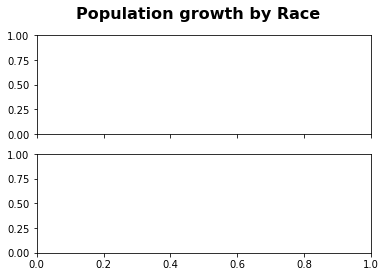

In [17]:
# fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle("Population growth by Race", fontsize=16, fontweight="bold")

fig.suptitle("Population growth by Race", fontsize=16, fontweight="bold")

ax1.set_xlim(cal_all_years["Population"]), max(cal_all_years["Population"])
ax1.plot(cal_all_years["Population"], cal_all_years['White alone'], linewidth=1, marker="o")
ax1.plot(cal_all_years["Population"], white_regress_values, "b--", linewidth=1)
ax1.set_ylabel("White Alone Count")

ax2.plot(cal_all_years["Population"], cal_all_years['Asian Alone'], linewidth=1, marker="o", color="r")
ax2.plot(cal_all_years["Population"], asian_regress_values, "r--", linewidth=1)
ax2.set_ylabel("Asian Alone Count")

# ax3.plot(year, aggravated_assault_rate, linewidth=1, marker="o", color="g")
# ax3.plot(year, aa_fit, "g--", linewidth=1)
# ax3.set_ylabel("Black and African American Count")
# ax3.set_xlabel("Year")

plt.show()

In [18]:
cal_all_years["Population"]

0     37659181.0
6     38066920.0
12    38421464.0
18    38654206.0
24    38982847.0
30    39148760.0
Name: Population, dtype: float64

In [ ]:
#Population vs Asian
plt.figure(figsize=(8,9))
x_values = cal_all_years["Population"]
y_values = cal_all_years['Asian Alone']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"red")
plt.scatter(x_values, y_values)
plt.xlabel("California Population")
plt.ylabel("California Unemployment Count")
plt.title("Population vs Unemployment Count")
print(f"The P Value is :{pvalue}")
plt.savefig('population_unemployment_scatter', dpi=300)
plt.show()

The P Value is :0.0006331670738286369


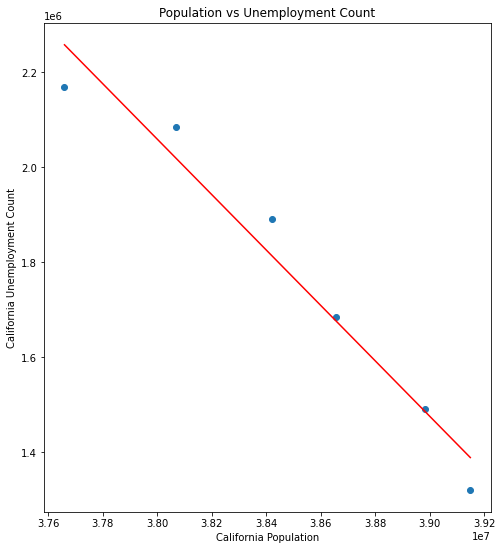

In [17]:
#Population vs Unemployment Count
plt.figure(figsize=(8,9))
x_values = cal_all_years["Population"]
y_values = cal_all_years['Unemployement count']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"red")
plt.scatter(x_values, y_values)
plt.xlabel("California Population")
plt.ylabel("California Unemployment Count")
plt.title("Population vs Unemployment Count")
print(f"The P Value is :{pvalue}")
plt.savefig('population_unemployment_scatter', dpi=300)
plt.show()


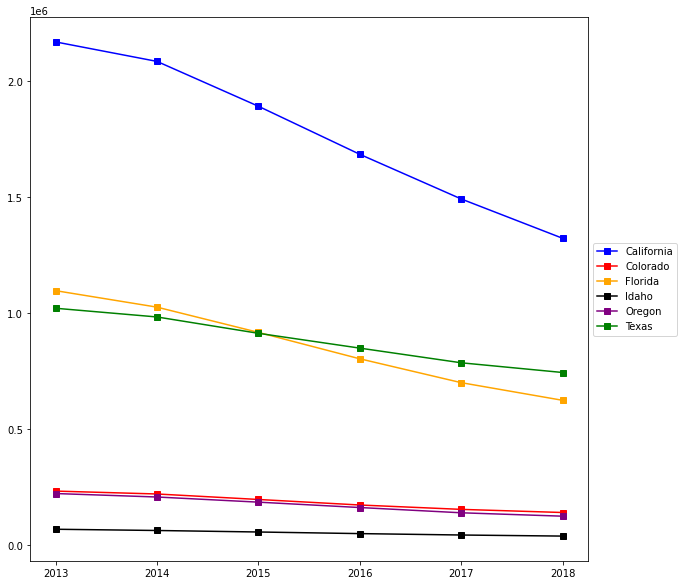

In [21]:
#Unemmployment count all states - Dan

plt.figure(figsize=(10,10))
x_axis = cal_all_years["Year"]
y_axis_ca = cal_all_years["Unemployement count"]
y_axis_co = colorado_all_years["Unemployement count"]
y_axis_fl = florida_all_years["Unemployement count"]
y_axis_id = idaho_all_years["Unemployement count"]
y_axis_or = oregon_all_years["Unemployement count"]
y_axis_tx = texas_all_years["Unemployement count"]

california, = plt.plot(x_axis, y_axis_ca, marker="s",color="blue", label="California")
colorado, = plt.plot(x_axis, y_axis_co, marker="s",color="red", label="Colorado")
florida, = plt.plot(x_axis, y_axis_fl, marker="s",color="orange", label="Florida")
idaho, = plt.plot(x_axis, y_axis_id, marker="s",color="black", label="Idaho")
oregon, = plt.plot(x_axis, y_axis_or, marker="s",color="purple", label="Oregon")
texas, = plt.plot(x_axis, y_axis_tx, marker="s",color="green", label="Texas")

# Set our legend to where the chart thinks is best
plt.legend(handles=[california, colorado, florida, idaho, oregon, texas], loc="center left", bbox_to_anchor=(1, 0.5))


The Regress is :y = -7.58x + 6608749.38
The P Value is :0.0025258214266583585


<function matplotlib.pyplot.show(*args, **kw)>

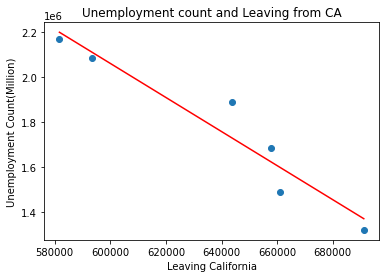

In [32]:
#relationship between Unemloyment and leaving CA - Dan

labels = ["2013", "2014", "2015", "2016", "2017", "2018"]
Into_CA = [485477, 513968, 514477, 514758, 523131, 501023]
Leaving_CA =[581679.0, 593308.0, 643710.0, 657690.0, 661026.0, 691145.0]
leaving_ca_df = pd.DataFrame(Leaving_CA) 


x_values = Leaving_CA
y_values = cal_all_years["Unemployement count"]

plt.scatter(Leaving_CA, y_values)

# Set the label and width for the bar chart
width = 0.35

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = np.array(x_values) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Set x-axis label, y-axis label, title, and legend for the bar graph
plt.plot(x_values,regress_values,"red")
plt.ylabel("Unemployment Count(Million)")
plt.xlabel("Leaving California")
plt.title("Unemployment count and Leaving from CA")

print(f"The Regress is :{line_eq}")
print(f"The P Value is :{pvalue}")

plt.show
